# CTA Assignment 2 Alicia Savelli

#### Question 1

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
#function to be differentiated
def func(x):
    """sine function
    
    Parameters:
    x: independent variable
    
    Return:
    sin(x)"""
    return np.sin(x)

In [3]:
#First approximation of the derivative 
def deriv1(f,x0,h):
    """Approximation of derivative of function
    
    Parameters:
    f: function
    x0: point about which to calculate the derivative
    h: infinitessimal step
    
    Returns:
    Approximated derivative of f  
    """
    return (f(x0+h)-f(x0))/h

#derivative at x0=0.1
print(deriv1(func,0.1,0.1))
print(deriv1(func,0.1,0.001))
print(deriv1(func,0.1,0.000000001))
print(deriv1(func,0.1,1e-15))

0.9883591414823306
0.994954082739849
0.9950041623962845
0.9992007221626408


In [4]:
#Second approximation of the derivative
#First approximation of the derivative 
def deriv2(f,x0,h):
    """Approximation of derivative of function
    
    Parameters:
    f: function
    x0: point about which to calculate the derivative
    h: finite step
    
    Returns:
    Approximated derivative of f  
    """
    return (f(x0+h)-f(x0-h))/(2*h)

#derivative at x0=0.1
print(deriv2(func,0.1,0.1))
print(deriv2(func,0.1,0.001))
print(deriv2(func,0.1,0.000000001))
print(deriv2(func,0.1,1e-15))

0.9933466539753061
0.995003999444008
0.9950041623962845
0.9922618282587335


/opt/python/3.6.4/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]
/opt/python/3.6.4/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


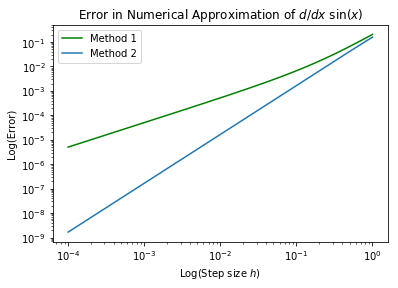

In [11]:
h = np.linspace(0,1,10000) 

y1n = []
y2n = []
for i in range(len(h)):
    y1n.append(deriv1(func,0.1,h[i])) #numerical derivative method 1
    y2n.append(deriv2(func,0.1,h[i])) #numerical derivative method 2
        
ya = np.cos(0.1) #analytic derivative

#plot error
plt.loglog(h, abs(y1n-ya)/ya, 'g', label='Method 1')
plt.loglog(h, abs(y2n-ya)/ya, label='Method 2')

plt.legend()
plt.xlabel("Log(Step size $h$)")
plt.ylabel("Log(Error)")

plt.savefig("q1.pdf")
plt.savefig("q1.eps")
plt.title("Error in Numerical Approximation of $d/dx$ sin($x$)")

plt.show()

#### Question 2

In [6]:
#mandlebrot function
def mandlebrot(x,y):
    """z_i+1 = z_i^2 + c
    
    Parameters:
    x and y such that c = x + iy
    
    Returns: 
    div: boolean, does z at this point diverge after many iterations?
    i: iteration at which this point diverges (i = 255 if div = False)"""
    z = 0 #initial z = 0
    div = False #boolean, does z diverge at point c = x +iy?
    inf = 100 #"infinity" - if abs(z) > 100, we will say z diverges at c = x + iy
    i = 0 #counting number
    maxi = 255 #chosen because of RBG numbering
    
    #determine if z diverges for each c = x + iy for -2 < x,y < 2
    #If z diverges, determine the iteration at which it diverges
    while abs(z) < inf and i < maxi:
        z = z*z + complex(x,y)
                
        if abs(z) > inf:
            div = True
        
        i += 1

    return div, i        

In [7]:
#generate x,y
x = np.linspace(-2,2,2000)
y = np.linspace(-2,2,2000)

#store data from mandlebrot function in arrays
data1 = np.empty((len(y),len(x)))
data2 = np.empty((len(y),len(x)))
for i, xx in enumerate(x):
    for j, yy in enumerate(y):
        data1[j][i] = mandlebrot(xx,yy)[0]
        data2[j][i] = mandlebrot(xx,yy)[1]

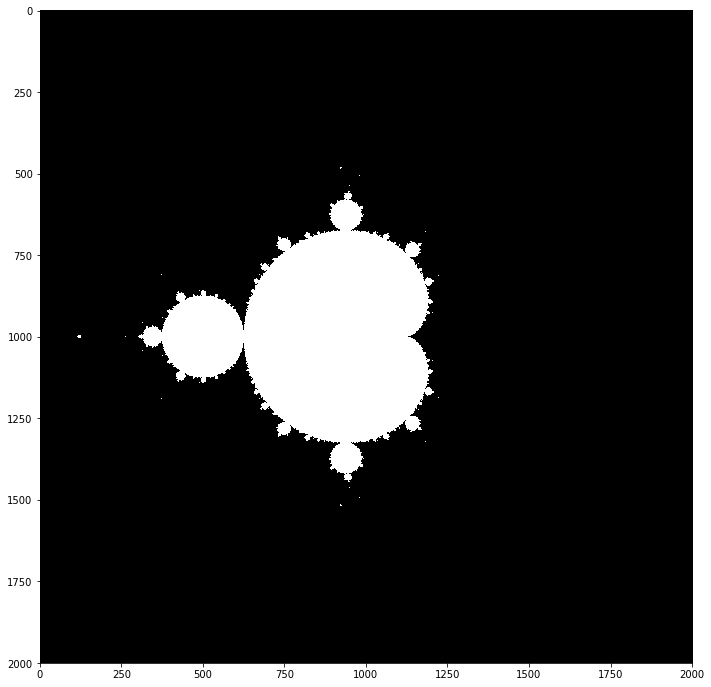

In [8]:
#plot boolean div
plt.figure(figsize = (12,12))
plt.imshow(data1,interpolation="nearest",cmap="Greys")
plt.savefig("q2a.pdf")
plt.savefig("q2a.eps")

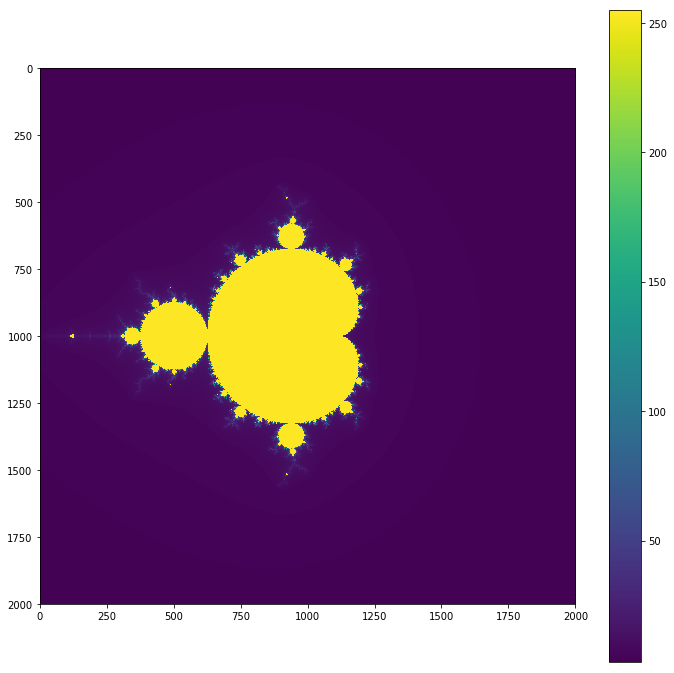

In [9]:
#plot iteration of div
plt.figure(figsize = (12,12))
plt.imshow(data2,interpolation="nearest",cmap="viridis")
plt.colorbar()
plt.savefig("q2b.pdf")
plt.savefig("q2b.eps")

#### Question 3

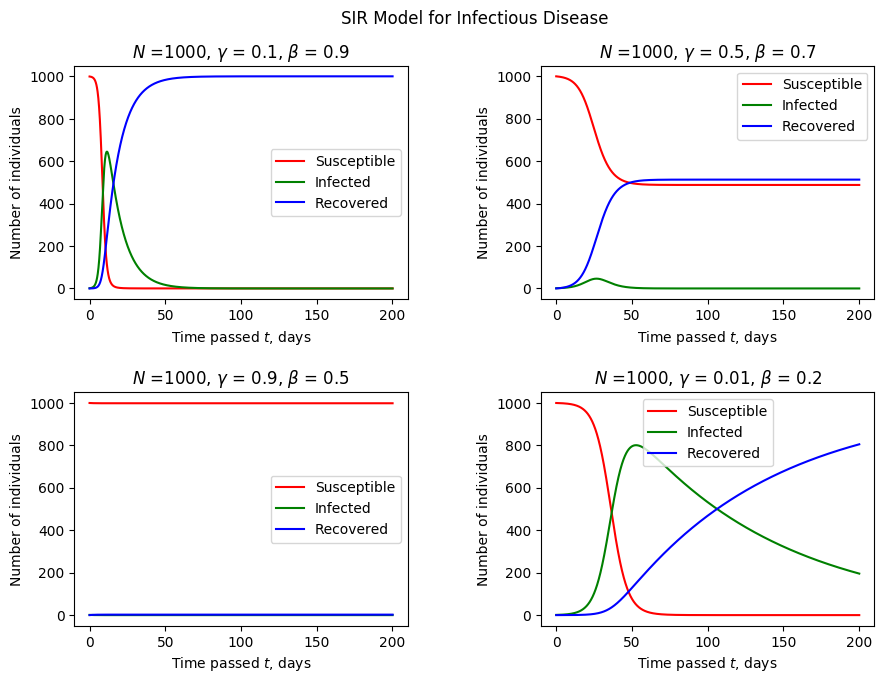

In [10]:
import numpy as np
import matplotlib.pylab as plt
from scipy.integrate import ode

#system of DE
def SIR(t, y, B, g, N):
    """SIR model of infectious diseases
    
    Parameters:
    t: time
    y: function of time : S susceptible, I infected, R removed
    B: beta : transmission coefficient
    g: gamma : inverse of average duration of infectious period
    N: populatin size 
    
    Returns:
    system of ODE"""
    
    S, I, R = y
    
    return [-B*S*I/N, B*S*I/N-g*I, g*I]

#IC 
y0 = [999, 1, 0]
t0 = 0

#choose B, g, N
B = [0.9, 0.7, 0.5, 0.2]
g = [0.1, 0.5, 0.9, 0.01]
N = 1000

# End time, timestep
t_end = 200
dt = 0.1 

fig, ax = plt.subplots(2, 2, dpi=100, figsize=(10, 7))
fig.suptitle('SIR Model for Infectious Disease')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

for i in range(len(B)):
    # Array to store the results
    times = [t0]
    res = [y0]
    
    solver = ode(SIR)
    solver.set_integrator('dopri5')
    solver.set_initial_value(y0, t0)
    solver.set_f_params(B[i], g[i], N)

    # Solve the equation
    while solver.successful() and solver.t < t_end:
        times.append(solver.t + dt)
        res.append(solver.integrate(solver.t + dt))

    S, I, R = np.array(res).T
    times = np.array(times)

    j = k = 0
    if i == 0:
        j = k = 0
    if i == 1:
        j = 0
        k = 1
    if i == 2:
        j = 1
        k = 0
    if i == 3:
        j = k = 1
    
    # plot the results 
    ax[j,k].plot(times, S, 'r', label='Susceptible')
    ax[j,k].plot(times, I, 'g', label='Infected')
    ax[j,k].plot(times, R, 'b', label='Recovered')

    ax[j,k].legend()
    ax[j,k].set_xlabel('Time passed $t$, days')
    ax[j,k].set_ylabel('Number of individuals')
    ax[j,k].set_title('$N$ =' + str(N) + r', $\gamma$ = ' + str(g[i]) + r', $\beta$ = ' + str(B[i]))

plt.savefig("q3.pdf")
plt.savefig("q3.eps")

plt.show()

    